In [53]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
# Importing the data 
data = pd.read_excel('/Users/janani/Documents/Corizo/MiniProject/Minor Project Data set (Stock Price Prediction).xlsx')

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [7]:
#Exploring the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [9]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
print(data['Open'].mean())
print(data['Low'].mean())
print(data['High'].mean())

419.05967286223984
412.37404380178396
425.3207030802775


In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [38]:
prices = data['Close'].values

In [30]:
prices

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001
...,...
1004,427.140015
1005,457.130005
1006,429.480011
1007,405.600006


In [15]:
data.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False


In [19]:
data['Date'].unique().size

1009

In [20]:
data[data['Close'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [23]:
print(f'Data contains the stock price for the period {data.Date.min()} to {data.Date.max()}')
print(f'for {data.Date.max() - data.Date.min()} days')

Data contains the stock price for the period 2018-02-05 00:00:00 to 2022-02-04 00:00:00
for 1460 days 00:00:00 days


<Axes: >

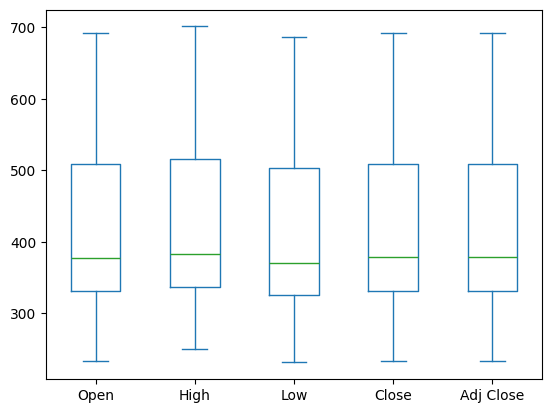

In [24]:
data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [42]:
training_set = data.iloc[:, 1:2].values

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [43]:
scaled_prices = scaler.fit_transform(training_set)
print(scaled_prices)

[[0.06125254]
 [0.03005911]
 [0.07124314]
 ...
 [0.46753051]
 [0.4090483 ]
 [0.3782257 ]]


In [55]:
# Create X and y using array slicing
# Create features and labels
X = []
y = []

for i in range(1, len(scaled_prices)):
    X.append(scaled_prices[i-1])
    y.append(scaled_prices[i])

# Convert to numpy arrays
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [59]:
# Inverse transform the predictions and actual values
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)
y_pred_train = scaler.inverse_transform(y_pred_train)
y_pred_test = scaler.inverse_transform(y_pred_test)

In [60]:
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 10.738879940158913
Test RMSE: 11.891594527237768


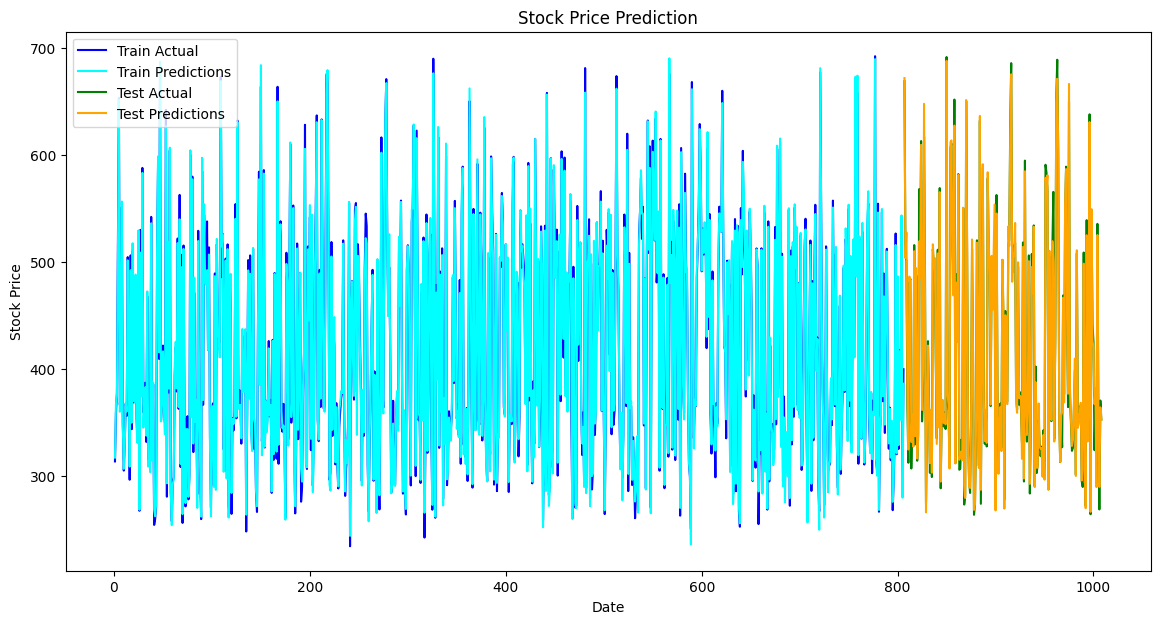

In [61]:
# Plot the results
plt.figure(figsize=(14, 7))

plt.plot(data.index[1:len(y_train)+1], y_train, label='Train Actual', color='blue')
plt.plot(data.index[1:len(y_train)+1], y_pred_train, label='Train Predictions', color='cyan')

plt.plot(data.index[len(y_train)+1:], y_test, label='Test Actual', color='green')
plt.plot(data.index[len(y_train)+1:], y_pred_test, label='Test Predictions', color='orange')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.show()